In [21]:
# Loading the dataset

import numpy as np
import pandas as pd

df = pd.read_csv('Suicide data set.csv')

In [22]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [23]:
df.shape

(27820, 12)

### Section A

In [24]:
#  1. How many categorical variables does the data contain?
#     Please state the number of categories for each such variable.

print('There are two categorical variables present in the given data')
print('1. sex with 2 categories')
print('2. generation with 6 categories')

There are two categorical variables present in the given data
1. sex with 2 categories
2. generation with 6 categories


In [25]:
#  2. How strong is the correlation between HDI and suicides_no?

print(df.corr())
print('\n The correlation between HDI and suicides_no with null values is 0.151399')

                        year  suicides_no  population  suicides/100k pop  \
year                1.000000    -0.004546    0.008850          -0.039037   
suicides_no        -0.004546     1.000000    0.616162           0.306604   
population          0.008850     0.616162    1.000000           0.008285   
suicides/100k pop  -0.039037     0.306604    0.008285           1.000000   
HDI for year        0.366786     0.151399    0.102943           0.074279   
gdp_per_capita ($)  0.339134     0.061330    0.081510           0.001785   

                    HDI for year  gdp_per_capita ($)  
year                    0.366786            0.339134  
suicides_no             0.151399            0.061330  
population              0.102943            0.081510  
suicides/100k pop       0.074279            0.001785  
HDI for year            1.000000            0.771228  
gdp_per_capita ($)      0.771228            1.000000  

 The correlation between HDI and suicides_no with null values is 0.151399


In [26]:
#  3. Which generation has the highest number of suicides/100k pop?

df.groupby('generation')['suicides/100k pop'].count()

print('Generation X is having the highest suicides/100k pop with 6408 in number')

Generation X is having the highest suicides/100k pop with 6408 in number


In [27]:
#  4. Which country has the least number of suicides between 1990-1995?

df1 = df[df.year >= 1990]

df1 = df1[df.year <= 1995]

print(df1.groupby('country')['suicides_no'].count().min())

print('The least number of suicides is 12')

a = df1.groupby('country')['suicides_no'].count().sort_values(ascending=True)
a.head(9)

print('Countries with least number of suicides are Macau, Slovenia, Estonia, Qatar, Switzerland'
      'Latvia, Lithuania, Aruba, Croatia')


12
The least number of suicides is 12
Countries with least number of suicides are Macau, Slovenia, Estonia, Qatar, SwitzerlandLatvia, Lithuania, Aruba, Croatia


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


## Section B


In [28]:
#  5. Are there any countries with no suicides recorded?  Create a new data frame which ranks these countries by HDI.

print(df.groupby('country')['suicides_no'].count().min())

print('There are no countries without suicides')


10
There are no countries without suicides


In [29]:
ranked = df.groupby('country')['HDI for year'].count().sort_values(ascending=True)

print(ranked.head())

country
Mongolia                 0
Cabo Verde               0
Saint Kitts and Nevis    0
Russian Federation       0
Aruba                    0
Name: HDI for year, dtype: int64


In [30]:
#  6. Generate suitable graphs for comparing suicides between men and women for the top 5 countries 
#     with the highest suicide rate per 100,000. 

b = df.groupby('country')['suicides/100k pop'].count().sort_values(ascending=False)
b.head()

country
Mauritius      382
Iceland        382
Austria        382
Netherlands    382
Mexico         372
Name: suicides/100k pop, dtype: int64

In [31]:
print('From the above groupby we can understand that'
      ' 1. Mauritius '
      ' 2. Iceland '
      ' 3. Austria '
      ' 4. Netherlands '
      ' 5. Mexico '
      ' are the top 5 countries with highest suicides rate per 100,100.')

#sns.barplot(x = df['suicides/100k pop'], y = df['country'] == 'Mauritius')


From the above groupby we can understand that 1. Mauritius  2. Iceland  3. Austria  4. Netherlands  5. Mexico  are the top 5 countries with highest suicides rate per 100,100.


In [32]:
#  7. Are there any redundant columns in the dataset? Which coulmn is it? Can that column be dropped? 
#     State your reasons.

print('1. column country-year can be dropped because country and year are given in seperate column '
      '2. column gdp_for_year can be dropped because we dont use it' 
      '3. column HDI for year can also be dropped because it has null values')

1. column country-year can be dropped because country and year are given in seperate column 2. column gdp_for_year can be dropped because we dont use it3. column HDI for year can also be dropped because it has null values


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


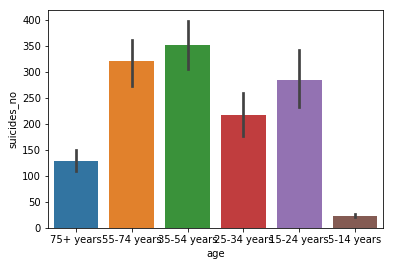

In [33]:
#  8. Please obtain the distribution of suicides for each age group for Argentina. 
#     Plot these as graphs

import seaborn as sns
import matplotlib.pyplot as plt


df2 = df[df.country == 'Argentina']

sns.barplot(x = df2['age'], y = df2['suicides_no'])


suicides_no/population, year/gdp_per_capita($) are highly correlated.HDI for year and gdp_per_capita($) is also highly correlated but HDI has nan values


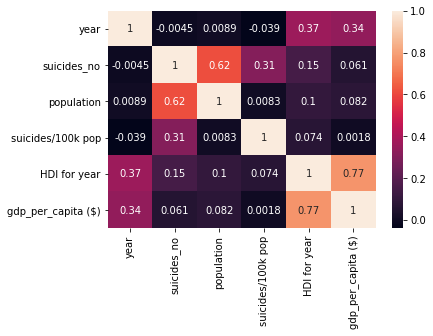

In [34]:
#  9. Generate a correlation heatmap for the dataset. 
#     Which pairs of variables are highly correlated.

sns.heatmap(df.corr(),annot=True)

print('suicides_no/population, year/gdp_per_capita($) are highly correlated.'
      'HDI for year and gdp_per_capita($) is also highly correlated but HDI has nan values')

## Section C

In [35]:
#  10

# . A

new1 = df.drop(['sex','age','population','suicides/100k pop','country-year','HDI for year',
               ' gdp_for_year ($) ','gdp_per_capita ($)','generation'],axis = 1)


print('There are totally', new1['suicides_no'].sum(),'suicides')

new1.head()



There are totally 6748420 suicides


,country,year,suicides_no
0,Albania,1987,21
1,Albania,1987,16
2,Albania,1987,14
3,Albania,1987,1
4,Albania,1987,9


In [36]:
# B.

new2 = df.drop(['sex','age','population','suicides_no','suicides/100k pop','country-year','HDI for year',
               ' gdp_for_year ($) ','generation'],axis = 1)

new2.head()

,country,year,gdp_per_capita ($)
0,Albania,1987,796
1,Albania,1987,796
2,Albania,1987,796
3,Albania,1987,796
4,Albania,1987,796


In [37]:
# c.

new3 = pd.merge(new1,new2,how='inner')
new3.head()

,country,year,suicides_no,gdp_per_capita ($)
0,Albania,1987,21,796
1,Albania,1987,21,796
2,Albania,1987,21,796
3,Albania,1987,21,796
4,Albania,1987,21,796
